# Haberman's Survival Dataset

Overview of the dataset:

Number of points:      306
Number of features:    Three 
                       'Age', Operation year', 'axil nodes'
Number of Classes:     Two 
                       1 - Patients who survived for 5 years or longer
                       2 - Patients who survived for less than 5 years
Data points per Class: 1 - 224
                       2 - 162

Objective:

To determine if a cancer patient who had undergone operation survived for more than 5 years or less.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

haber = pd.read_csv('C:/AI/PANDAS/haberman.csv')

In [3]:
# Number of data points and features
print(haber.shape)

(306, 4)


In [4]:
# Number of columns
print(haber.columns)

Index(['age', 'operation_year', 'axil_nodes', 'surv_status'], dtype='object')


In [5]:
haber["surv_status"].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

# 2-D scatter plot

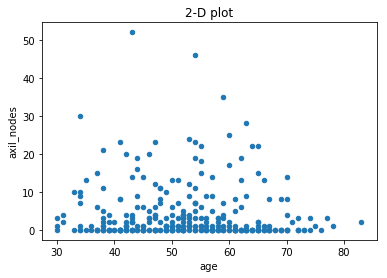

In [6]:
#2D - Scatter plot 
haber.plot(kind='scatter', x='age', y='axil_nodes');
plt.title('2-D plot') ;
plt.show()

Observation:

Cannot make much inference about the data from the above plot.

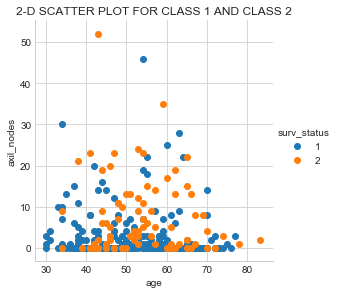

In [7]:
#adding colour based on the class and plot
sns.set_style("whitegrid")
sns.FacetGrid(haber, hue = 'surv_status', size = 4) \
    .map(plt.scatter,'age','axil_nodes')\
    .add_legend();
plt.title('2-D SCATTER PLOT FOR CLASS 1 AND CLASS 2');
plt.show()

Observation:

Although we distinguish between patients belonging to class 1 and class 2 based on their colour, we cannot divise an algorithm for the same since the points almost overlap.


# Pair Plot

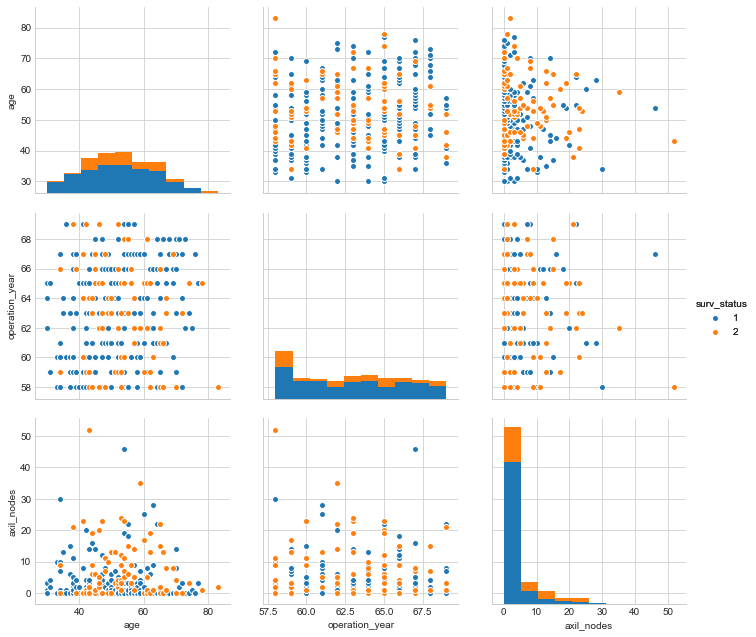

In [8]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber,vars =['age','operation_year','axil_nodes'], hue = "surv_status", size = 3).add_legend();
plt.show()

Observation:

1. Only the features age vs axil_nodes gives somewhat a clear plot for both the classes.
2. For the other plots, all the points are overlapping to a huge extent.
3. Most of the axil_nodes fall between 0 - 10 interval for both class 1 and class 2 patients.

# Histogram

1-D scatter plot

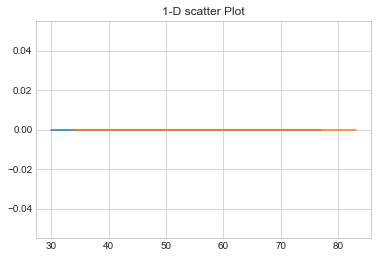

In [18]:
import numpy as np
haber_1 = haber.loc[haber['surv_status']==1]
haber_2 = haber.loc[haber['surv_status']==2]
plt.plot(haber_1['age'], np.zeros_like(haber_1['age']))
plt.plot(haber_2['age'], np.zeros_like(haber_2['age']))
plt.title('1-D scatter Plot');
plt.show()


Observation:
For class 1 patients, the age group is between 30 - 78.
For class 2 patients, the age group lies between 35 - 85.
There is overlapping for most of the portion in ages of both classes.

histogram

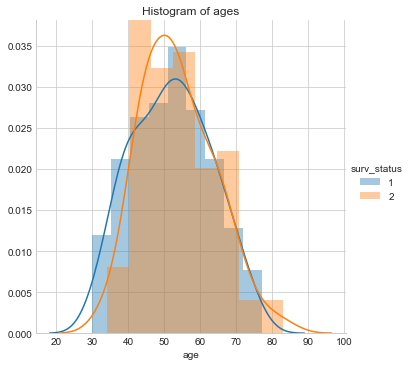

In [19]:
#when I plot using age 
sns.FacetGrid(haber,  hue ='surv_status', size = 5)\
.map(sns.distplot, 'age')\
.add_legend();
plt.title('Histogram of ages')
plt.show()


Observation:
We find that for lot of class 1 patients, the age lies between 52-58.
Also, for a lot of class 2 patients, the age lies between 40 - 46
We get a massive overlapping between patients with survival status =1 and those with survival status = 2 , therefore we cannot conclude an algorithm to differentiate between the ages of class 1 and class 2 patients. 


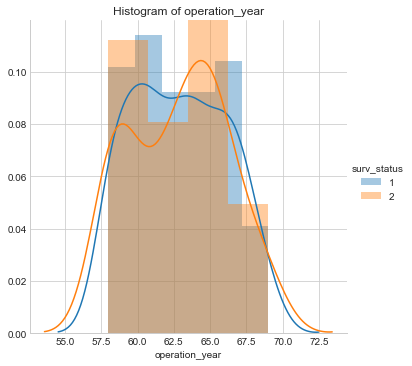

In [22]:
#plot using operation_year
sns.FacetGrid(haber,  hue ='surv_status', size = 5)\
.map(sns.distplot, 'operation_year')\
.add_legend();
plt.title('Histogram of operation_year')
plt.show()


Observation:
A large number of class 1 patients went through the operation in tge year 1960-1961.
In class 2, the maximum number of patients went through their operation in the year 1965.
Again, we get a massive overlapping between patients with survival status =1 and those with survival status = 2.


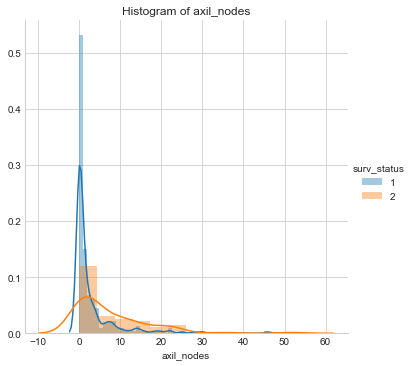

In [23]:
#plot using axil_node
sns.FacetGrid(haber,  hue ='surv_status', size = 5)\
.map(sns.distplot, 'axil_nodes')\
.add_legend();
plt.title('Histogram of axil_nodes')
plt.show()


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


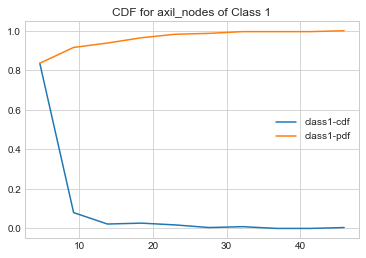

In [61]:
#compute PDF
counts, bin_edge = np.histogram(haber_1['axil_nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.title('CDF for axil_nodes of Class 1')
plt.legend(['class1-cdf','class1-pdf'])



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


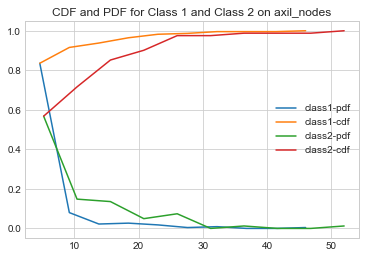

In [64]:
#For patients who lived 5years or more
counts, bin_edge = np.histogram(haber_1['axil_nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)


#For patients who lived less than 5 years
counts, bin_edge = np.histogram(haber_2['axil_nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.legend(['class1-pdf','class1-cdf','class2-pdf','class2-cdf']);

plt.title('CDF and PDF for Class 1 and Class 2 on axil_nodes')
plt.show()

Observations:
For class 1 - around 88 - 100 % people have  5  to 25 nodes effected.
For class 2 - around 58 - 100 % people have 5 to 38 nodes effected.
Therefore, patients who had more than 25 axillary nodes damaged couldnt survive for more than 5 years.


In [93]:
#Mean
print("Mean:")
print("\nMean for Class1 axillary nodes = ",np.mean(haber_1['axil_nodes']))
print("Mean for Class2 axillary nodes = ",np.mean(haber_2['axil_nodes']))
#Mean with an outlier
print("\nMean with an outlier in class1")
print("New Mean for class1 axillary nodes",np.mean(np.append(haber_1['axil_nodes'],1000)))


Mean:

Mean for Class1 axillary nodes =  2.7911111111111113
Mean for Class2 axillary nodes =  7.45679012345679

Mean with an outlier in class1
New Mean for class1 axillary nodes 7.20353982300885


When an outlier is added in Class1, the mean changes drastically from 2.8 to 7.2.
Therefore a single error(or outlier) can change the mean to a huge extent.

In [91]:
#Standard deviation
print("Standard devaitions:")
print("\nStandard deviation for Class1 patients =",np.std(haber_1['axil_nodes']))
print("Standard deviation for Class2 patients =",np.std(haber_2['axil_nodes']))

Standard devaitions:

Standard deviation for Class1 patients = 5.857258449412131
Standard deviation for Class2 patients = 9.128776076761632


In [79]:
#Median
print('Medians:')
print("Median of Class1 axillary nodes = ",np.median(haber_1['axil_nodes']))
print("Median of Class2 axillary nodes = ",np.median(haber_2['axil_nodes']))

Medians:
Median of Class1 axillary nodes =  0.0
Median of Class2 axillary nodes =  4.0


Since the median of Class 1 patients is zero, we can conlcude that majority of the patients who survived for 5 years or more had zero axillary nodes effected.

In [90]:
#quantile
print("Quantile:")
print("Quantile values for Class 1 patients =",np.percentile(haber_1['axil_nodes'], np.arange(0,100,25)))
print("Quantile values for Class 2 patients =", np.percentile(haber_2['axil_nodes'], np.arange(0,100,25)))

#90th percentile
print("\nPercentiles:")
print("90th percentile value for Class 1 =",np.percentile(haber_1['axil_nodes'],90))
print("90th percentile value for Class 2 =",np.percentile(haber_2['axil_nodes'],90))


Quantile:
Quantile values for Class 1 patients = [0. 0. 0. 3.]
Quantile values for Class 2 patients = [ 0.  1.  4. 11.]

Percentiles:
90th percentile value for Class 1 = 8.0
90th percentile value for Class 2 = 20.0


Observations:

From Quantiles:
In class 1 , 25th, 50th and 75th quantiles have a value of zero.Therefore, upto 75% patients of who survived for 5 years or more had zero axillary nodes effected.

In Class 2 , 25% of the patients had zero axillary nodes effected.50% of the patients have only 1 axillary nodes effected.

From Percentiles:
90% of patients in Class 1 ( who lived 5 years or more) had 8 infected axil nodes.
90% of pateinets in Class 2 ( who lived less than 5 years) had 20 infected axil nodes.

In [95]:
from statsmodels import robust
print('Median Absolute deviation')
print("\nMedian absolute deviation for Class1 patients =",robust.mad(haber_1['axil_nodes']))
print("Median absolute deviation for Class2 patients =", robust.mad(haber_2['axil_nodes']))


Median Absolute deviation

Median absolute deviation for Class1 patients = 0.0
Median absolute deviation for Class2 patients = 5.930408874022408


# Box Plot

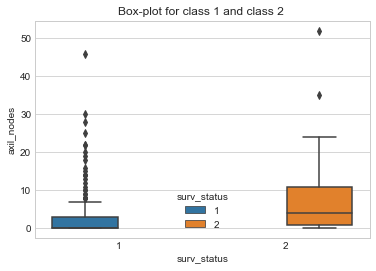

In [107]:
sns.boxplot(x ='surv_status', y = 'axil_nodes',hue ='surv_status', data = haber)
plt.title("Box-plot for class 1 and class 2 ")
plt.show()

# Violin Plot

Text(0.5,1,'Violin plot for Class 1 and Class 2')

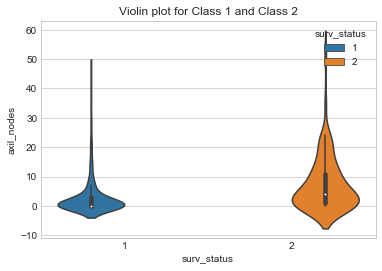

In [111]:
sns.violinplot(x='surv_status',y='axil_nodes',hue = 'surv_status', data = haber, size =6)
plt.title("Violin plot for Class 1 and Class 2")

# 2-D Density Plot, contors plot 

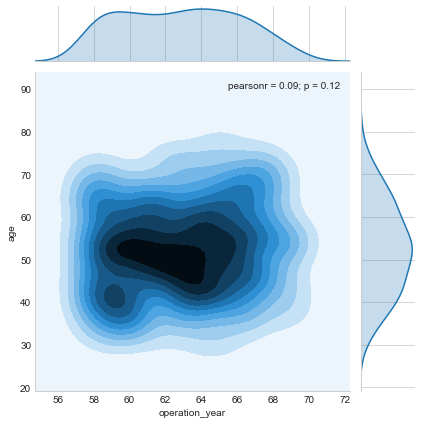

In [40]:
sns.jointplot(x='operation_year', y='age', data =haber, kind = 'kde')
plt.show()

Overall Conclusion:

#Out of the three features, axillary nodes is the one that gives more information to classify a patient if he belongs to class1 or class2.

#It can be observed that majority of the patients who lived 5 years or more had zero defected axillary nodes.

#Out of the total from class2 , 75% of the Patients had more than zero axillary nodes defected. Maximum defected axillary nodes for class 2 parients goes to 52.

#Patients who had less than 20 axil nodes effected had a higher chance of surviving for more than 5 years.

    